In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)

In [7]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

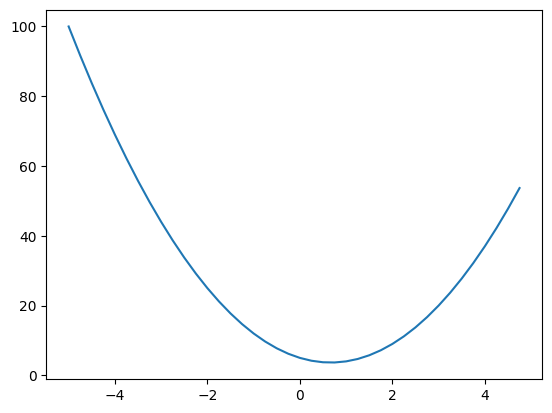

In [8]:
 plt.plot(xs, ys)

In [9]:
# let's look at the derivative of f(x)
h = 0.001
x = 3.0
print("derivative will be", (f(x+h) - f(x))/h)


derivative will be 14.00300000000243


In [10]:
# complex example of dervative 
#inputs
a = 2.0
b = -3.0
c = 10.0
h = 0.001
d = a * b + c
 
# derivative of function with respect to a
d1 = a*b + c
a = a + h 
d2 = a * b + c
print("d1" , d1)
print("d2", d2)
print("derivative of d with respect to a is", (d2 - d1)/h)

# derivative of function with respect to b 
d1 = a*b + c
b = b + h 
d2 = a * b + c
print("d1" , d1)
print("d2", d2)
print("derivative of d with respect to b is", (d2 - d1)/h)


# derivative of function with respect to c
d1 = a*b + c
c = c + h 
d2 = a * b + c
print("d1" , d1)
print("d2", d2)
print("derivative of d with respect to c is", (d2 - d1)/h)



d1 4.0
d2 3.997
derivative of d with respect to a is -3.0000000000001137
d1 3.997
d2 3.999001
derivative of d with respect to b is 2.0009999999999195
d1 3.999001
d2 4.000000999999999
derivative of d with respect to c is 0.9999999999994458


In [11]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"value(data={str(self.data)})"

In [12]:
a = Value(3.0)
a

value(data=3.0)

In [13]:
b = Value(4.0)
b

value(data=4.0)

In [14]:
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [15]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"value(data={str(self.data)})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

In [16]:
a= Value(3.0)
b=Value(4.0)
# a.__add__(b) 
a + b

value(data=7.0)

In [17]:
# when we are doing an expression, we need to feed in the childre, basically who all was involved in that 
# expression. Suppose it's a + b then the resultant needs to know that it was created by adding a and b.
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"value(data={str(self.data)})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other))
        return out
    
    def __truediv__(self, other):
        out = Value(self.data / other.data, (self, other))
        return out
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
print("d is " , d ) 
d._prev

d is  value(data=4.0)


{value(data=-6.0), value(data=10.0)}

In [18]:
#let's keep the track of the operation we have done in the expression and we will save it in the variable

class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):
        return f"value(data={str(self.data)})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), "-")
        return out
    
    def __truediv__(self, other):
        out = Value(self.data / other.data, (self, other), "/")
        return out
    
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0 , label="c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"
print("d is " , d ) 
f = Value(2.0, label="f")
L = d * f; L.label="L"
L, L.label

d is  value(data=4.0)


(value(data=8.0), 'L')

In [19]:
# code for visualization of the nodes. Src = Karpathy
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


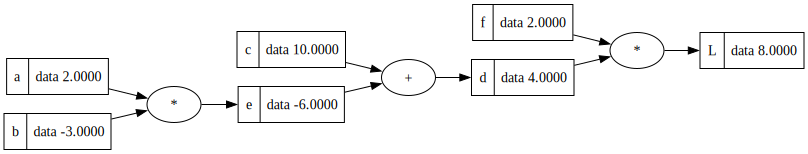

In [20]:
draw_dot(L)

In [21]:
# Here comes the grad !
#let's keep the track of the operation we have done in the expression and we will save it in the variable

class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0


    def __repr__(self):
        return f"value(data={str(self.data)})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), "-")
        return out
    
    def __truediv__(self, other):
        out = Value(self.data / other.data, (self, other), "/")
        return out
    
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0 , label="c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"
print("d is " , d ) 
f = Value(-2.0, label="f")
L = d * f; L.label="L"
L, L.label

d is  value(data=4.0)


(value(data=-8.0), 'L')

In [22]:
# code for visualization of the nodes. Src = Karpathy
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    # adds a grad visualization 
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


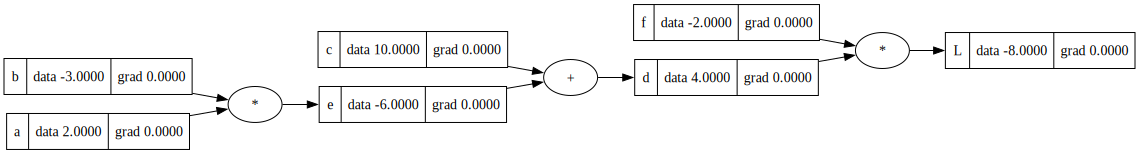

In [23]:
draw_dot(L)

In [24]:
def lol( ):
    h = 0.001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0 , label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f; L.label="L"
    L1 = L.data
    
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0 , label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    d.data += h 
    f = Value(-2.0 , label="f")
    L = d * f; L.label="L"
    L2= L.data
    print(L1)
    print(L2)
    print( (L2 - L1)/ h  ) # dL/df 
    
lol()

-8.0
-8.002
-2.000000000000668


In [25]:
f.grad=4.0
d.grad=-2.0

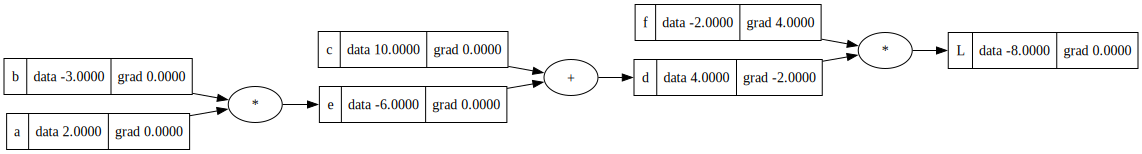

In [26]:
draw_dot(L)

dd / dc is 
d = c + e
then dd/dc = 1 
( f ( x + h ) - f ( x))/ h
= (( c + e + h) - c + e ) / h
= h/h = 1 


WANT:
    dL/ dc

KNOW: 
    dL / df # from previous state already stored
    dL / dd # from previous state already stored or calculated in the first stage 
    dd/ dc

GRADIENT: 
    dL / dc = ( dL / dd ) * ( dd / dc )
            = -2 * 1 = -2 





In [27]:
c.grad = -2.0 
e.grad = -2.0

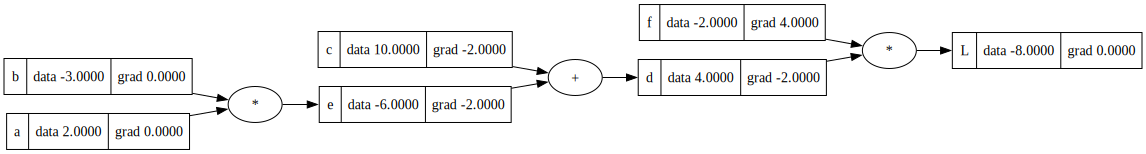

In [28]:
draw_dot(L)

In [29]:
# important step -> derive dL / dc 2nd order gradient
# understand how L is change with respect to c 
# what changes L with c 

def sec_order_deravitive():
    h = 0.001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0 , label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f; L.label="L"
    L1 = L.data
    
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b") 
    c = Value(10.0, label="c")
    c.data += h 
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0 , label="f")
    L = d * f; L.label="L"
    L2 = L.data
    print(L1)
    print(L2)
    print( (L2 - L1)/ h  ) # dL/dc
    
sec_order_deravitive()    




-8.0
-8.001999999999999
-1.9999999999988916


now we want derivative for L with respect to a and b 
dL / de = -2.0 
dL / da = ?
    ( dL / de )  * (de / da )  where (de / da ) is local gradient and ( dL / de )  is the calculated gradient 

=> de / da = b  = -3 
=> de / db = a  = 2 

=> DL / da = -2.0 * -3 
=> DL / db = -2.0 * 2 

In [30]:
a.grad = 6.0 
b.grad = -4.0 

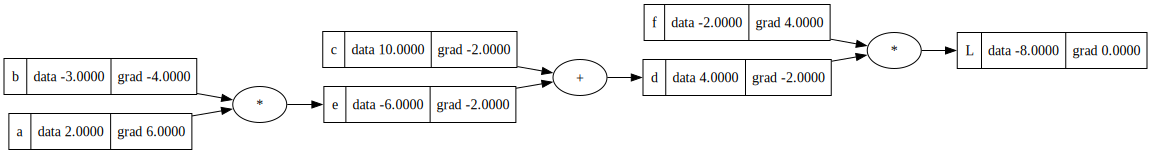

In [31]:
draw_dot(L)

In [32]:
# verify a.grad

# important step -> derive dL / dc 2nd order gradient
# understand how L is change with respect to c 
# what changes L with c 

def third_order_deravitive():
    h = 0.001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0 , label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f; L.label="L"
    L1 = L.data
    
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b") 
    c = Value(10.0, label="c")
    a.data += h 
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0 , label="f")
    L = d * f; L.label="L"
    L2 = L.data
    print(L1)
    print(L2)
    print( (L2 - L1)/ h  ) # dL/dc
    
third_order_deravitive()    


def third_order_deravitive():
    h = 0.001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0 , label="c")
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f; L.label="L"
    L1 = L.data
    
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b") 
    c = Value(10.0, label="c")
    b.data += h 
    e = a*b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0 , label="f")
    L = d * f; L.label="L"
    L2 = L.data
    print(L1)
    print(L2)
    print( (L2 - L1)/ h  ) # dL/dc
    
third_order_deravitive()   

-8.0
-7.994
6.000000000000227
-8.0
-8.004
-3.9999999999995595


In [33]:
# we will add the effect of gradient to the nodes by using a step size 
step = 0.01 # value with which we will update the percentage of data, that is the effect of grad on the values of weights

# I have only updated the leaf nodes, those are the ones that takes or get initialized with the data.
a.data += a.grad * step
b.data += b.grad * step
c.data += c.grad * step
f.data += f.grad * step

# what is forward pass -> update the values of nodes which are made from leaf nodes
e = a * b 
d = e + c 
L = d * f 

print(L.data)

-7.286496


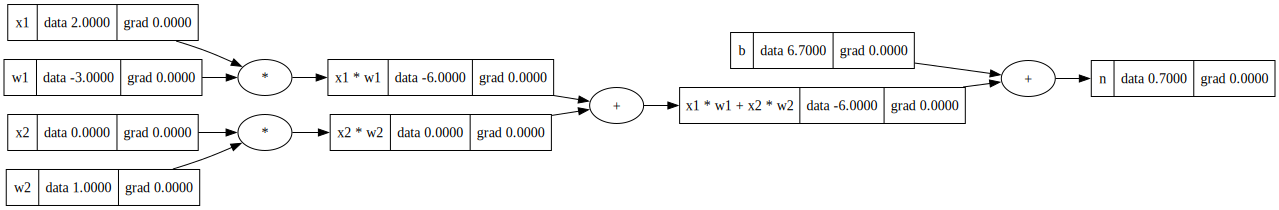

In [39]:
# let's dive into neuron
# we will create a neuron with 2 inputs and 1 output

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.7, label="b")

x1w1 = x1 * w1 ; x1w1.label = "x1 * w1"
x2w2 = x2 * w2 ; x2w2.label = "x2 * w2"
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1 * w1 + x2 * w2"

n = x1w1x2w2 + b ; n.label = "n"
draw_dot(n)

In [64]:
# in the above code we haven't implemented the activation function i.e. tanh 
# we will do it now. 

# Here comes the grad !
#let's keep the track of the operation we have done in the expression and we will save it in the variable

class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0


    def __repr__(self):
        return f"value(data={str(self.data)})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), "-")
        return out
    
    def __truediv__(self, other):
        out = Value(self.data / other.data, (self, other), "/")
        return out
    
    def tanh(self):
        t = ( 2.0 / (1 + np.exp(-2.0 * self.data ))) - 1
        out = Value( t , (self, ), "tanh" )
        return out

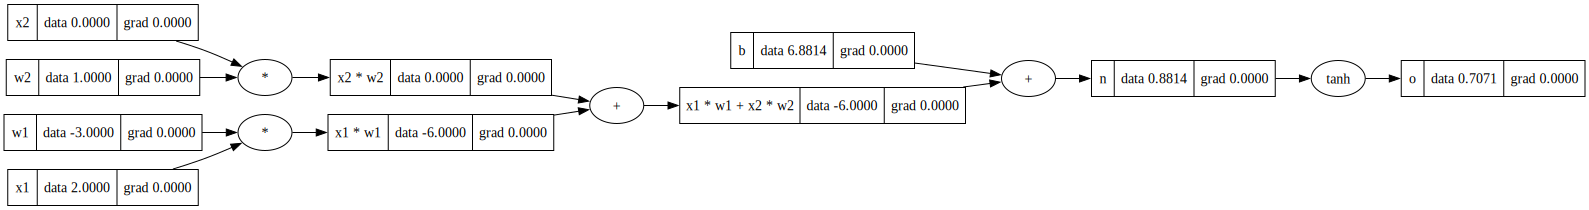

In [86]:
# let's dive into neuron
# we will create a neuron with 2 inputs and 1 output with tanh implementation 

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.8813735870195432, label="b")

x1w1 = x1 * w1 ; x1w1.label = "x1 * w1"
x2w2 = x2 * w2 ; x2w2.label = "x2 * w2"
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1 * w1 + x2 * w2"

n = x1w1x2w2 + b ; n.label = "n"
o = n.tanh() ; o.label = "o"
draw_dot(o)

In [87]:
# do/do is 1.0 
o.grad = 1.0 

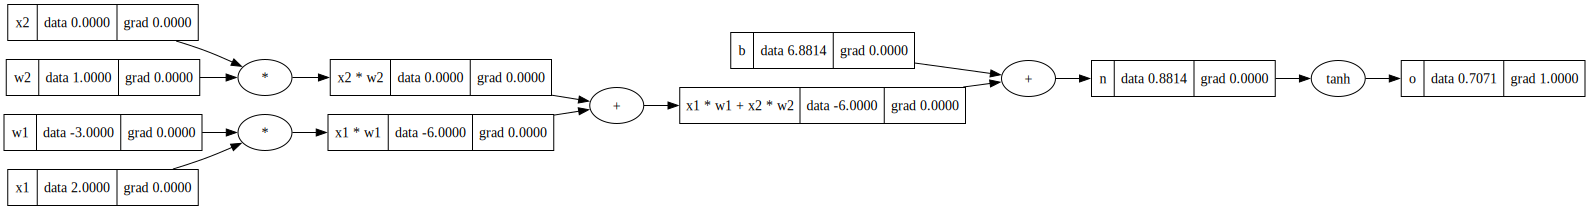

In [88]:
draw_dot(o)

In [89]:
# calculate do/dn and do = tanh(n) 
# do/dn = 1 - tanh(n) * tanh(n) 
# do/dn = 1 - o * o
# do/dn = 1 - o**2 
n.grad = 1- (o.data * o.data)
n.grad

0.5000000000000001

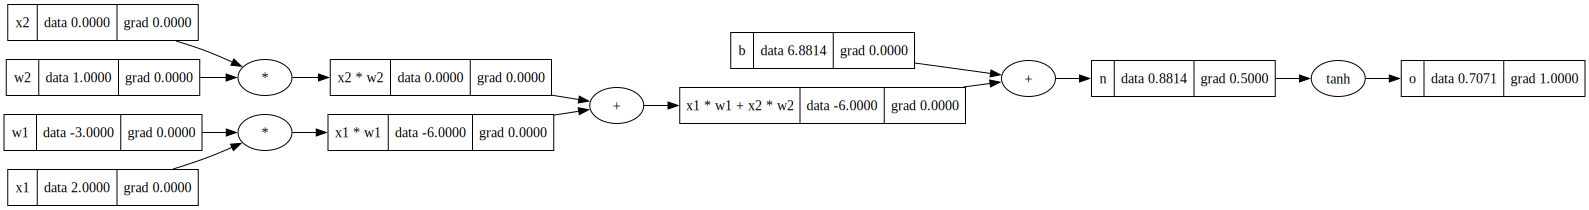

In [90]:
draw_dot(o)

In [91]:
# going for second order derivative 
# do/db = do/dn * dn/db
# do/db = n.grad * ( x1w1 + x2w2 + b )/db 
# do/db = n.grad * 1 
b.grad = n.grad * 1.0
b.grad

0.5000000000000001

In [92]:
# do/ dx1w1+x2w2 = do/dn * dn/dx1w1+x2w2
# do/ dx1w1+x2w2 = n.grad * ( b.data)
x1w1x2w2.grad = n.grad * 1.0
x1w1x2w2.grad

0.5000000000000001

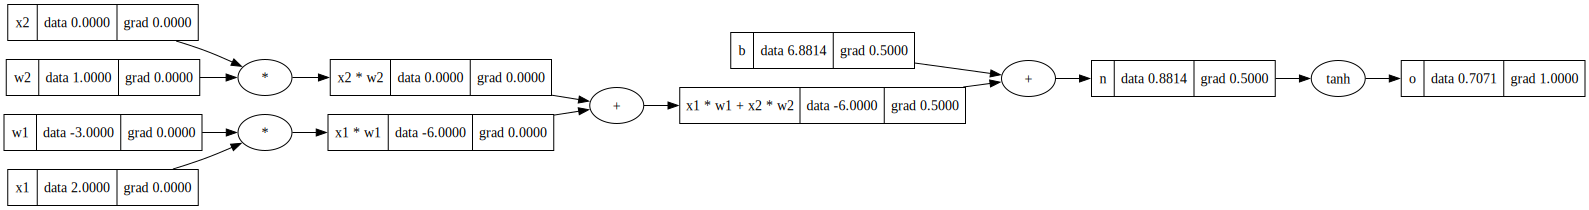

In [93]:
draw_dot(o)

In [95]:
x1w1.grad = 0.5
x2w2.grad = 0.5

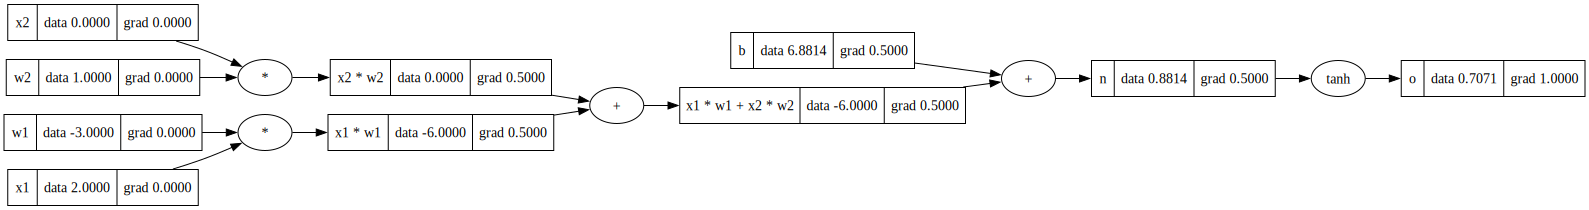

In [96]:
draw_dot(o)

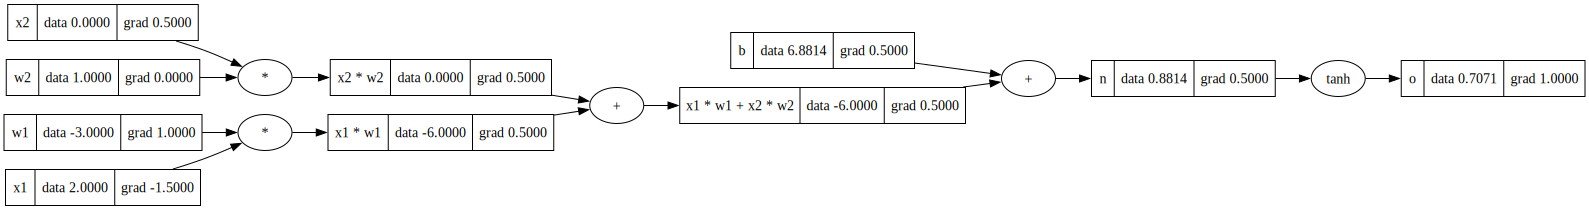

In [97]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
draw_dot(o)

In [118]:
# time to automatically add backward pass
# backward pass will be a function 

class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._backward = lambda: None # some function
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"value(data={str(self.data)})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        
        def backward():
            self.grad =  1 * out.grad
            other.grad = 1 * out.grad
        out._backward = backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        
        def backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = backward
        
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), "-")
        return out
    
    def __truediv__(self, other):
        out = Value(self.data / other.data, (self, other), "/")
        return out
    
    def tanh(self):
        t = ( 2.0 / (1 + np.exp(-2.0 * self.data ))) - 1 # tanh 
        out = Value( t , (self, ), "tanh" )
        
        def backward():
            self.grad = 1 - t**2 # 1 - tanh^2  
        out._backward = backward
        
        return out

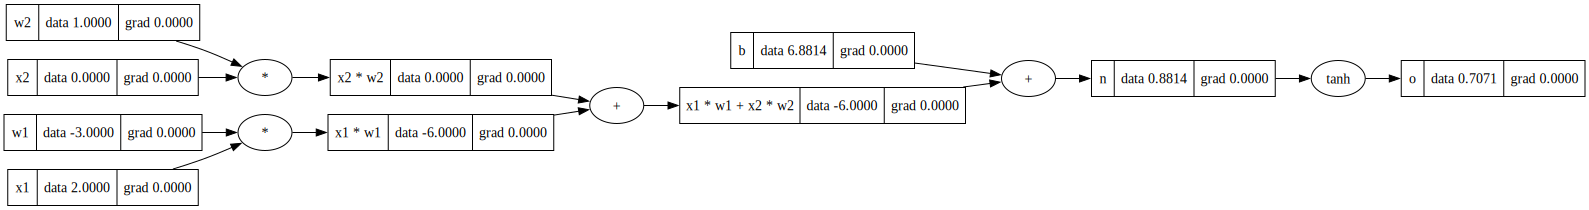

In [148]:

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.8813735870195432, label="b")

x1w1 = x1 * w1 ; x1w1.label = "x1 * w1"
x2w2 = x2 * w2 ; x2w2.label = "x2 * w2"
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1 * w1 + x2 * w2"

n = x1w1x2w2 + b ; n.label = "n"
o = n.tanh() ; o.label = "o"
draw_dot(o)

In [120]:
o.grad = 1.0 #  base case

In [121]:
o._backward()

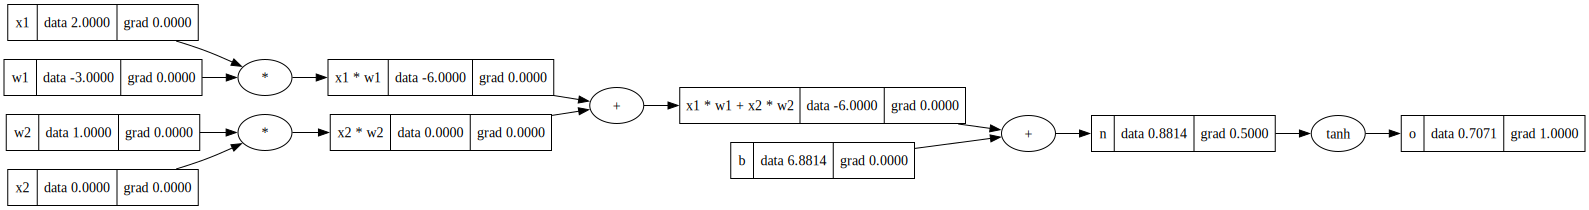

In [102]:
draw_dot(o)

In [122]:
n._backward()

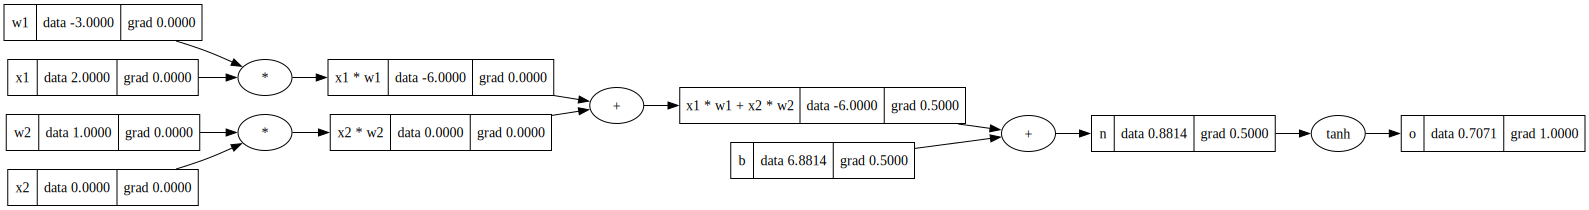

In [123]:
draw_dot(o)

In [124]:
x1w1x2w2._backward()

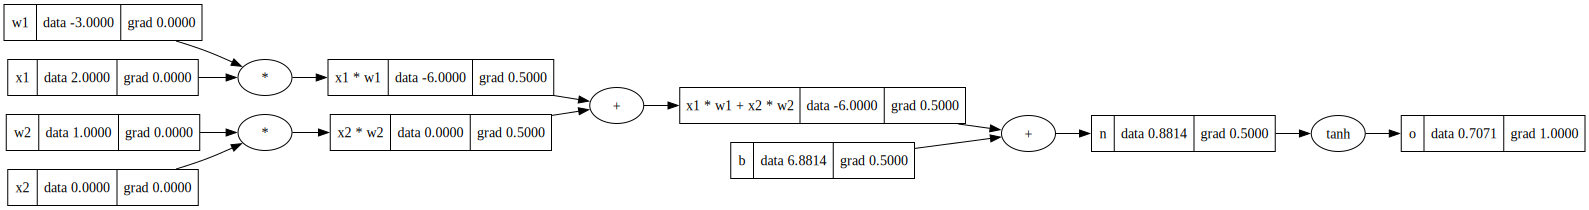

In [125]:
draw_dot(o)

In [126]:
x1w1._backward()
x2w2._backward()

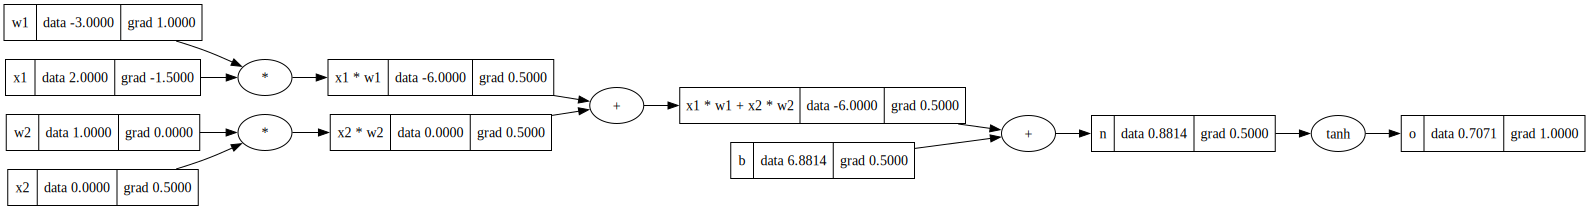

In [127]:
draw_dot(o)

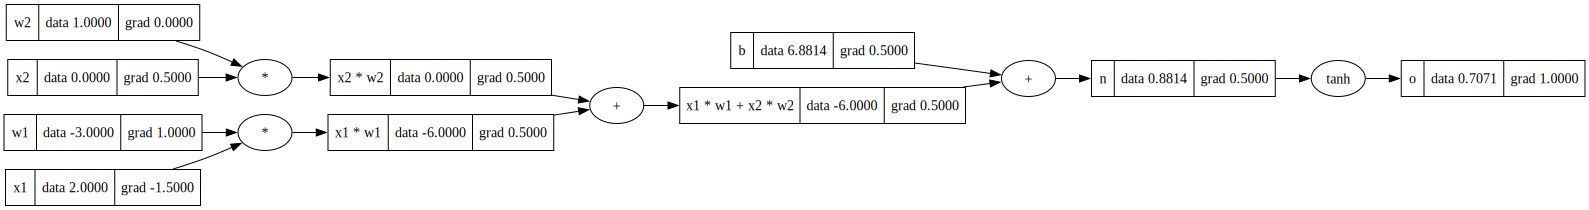

In [150]:
o.grad = 1.0 
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for children in v._prev:
            build_topo(children)
        topo.append(v)
build_topo(o)
for node in reversed(topo):
    node._backward()
draw_dot(o)